# K Nearest Neighbors Algorithm (KNN)

It is a supervised learning algorithm and non parametric model used for classification and regression problems.

It is an instance based learning algorithm, where the model memorizes the training instances and makes predictions based on the similarity (distance) between new instances and the stored ones.

<img src="https://s3.stackabuse.com/media/articles/k-nearest-neighbors-algorithm-python-scikit-learn-4.png">

#### Pros :
- **Simple** and easy to understand.
- **No training phase** is required, that means no expensive during training.

#### Cons :
- Can be computationally **expensive during the prediction phase**, especially with large datasets.
- **Sensitivity to irrelevant features** and the need for feature scaling.
- **Performance can be affected by the curse of dimensionality**, where the feature space becomes sparse in high-dimensional data.

KNN is the simplest method in machine learning for training, let us see the step by step training and prediction algorithm :-

#### 1. Training phase :
It is in a simple way, just put the data points (features) in the N-dimentional space.

#### 2. Prediction phase :
- The process of make predictions for new data.
- For a new input, the algorithm calculates the distance between that input and all the training examples.
- The most common distance metric used is **Euclidean distance**, but other distance metrics like **Manhattan distance** can also be used.
- The algorithm then selects the top **K** training examples that are closest to the new input, where k is a user-defined parameter.
- For classification tasks, the algorithm assigns the **class label** that is most common among the k-nearest neighbors.
- For regression tasks, the algorithm predicts the **average** or weighted average of the target values of the k-nearest neighbors.

#### 3. Hyperparameters :
- **K** : which represents the number of neighbors to consider. The choice of 'k' can significantly impact the performance of the algorithm.
- **The distance metric** : that can be adjusted based on the characteristics of the data. Examples such as : Euclidean Distance, Manhattan Distance (L1 norm), Minkowski Distance, Cosine Similarity (for vectors), and a lot.

#### Euclidean Distance :

Euclidean distance is a measure of the straight-line distance between two points in Euclidean space (such as two points in a two-dimensional or three-dimensional space). It is the most common distance metric and is often used in various machine learning algorithms, including K-Nearest Neighbors (KNN). The Euclidean distance between two points $(x_{1}, y_{1}) and (x_{2}, y_{2})$ in a two dimensional space is given by the following formula:

$$ d(x, y) = \sqrt{\sum \limits _{i=1} ^n (x_{i} - y_{i})^2} $$

### Example

Consider this dataset :-

| ID | Sepal Length | Sepal Width | Species |
|----|--------------|-------------|---------|
| 1  | 5.3          | 3.7         | Setosa  |
| 2  | 5.1          | 3.8         | Setosa  |
| 3  | 7.2          | 3.0         | Vir     |
| 4  | 5.4          | 3.4         | Setosa  |
| 5  | 5.1          | 3.3         | Setosa  |
| 6  | 5.4          | 3.9         | Setosa  |
| 7  | 7.4          | 2.8         | Vir     |
| 8  | 6.1          | 2.8         | Vers    |
| 9  | 7.3          | 2.9         | Vir     |
| 10 | 6.0          | 2.7         | Vers    |
| 11 | 5.8          | 2.8         | Vir     |
| 12 | 6.3          | 2.3         | Vers    |
| 13 | 5.1          | 2.5         | Vers    |
| 14 | 6.3          | 2.5         | Vers    |
| 15 | 5.5          | 2.4         | Vers    |

<br>
<br>

We want you predict the new instances, where **K=1** and the distance metric is Euclidean metric :-

1. Flower A : Length = 5.9 and Width = 3.0, Species = **??**
2. Flower B : Length = 4.0 and Width = 2.8, Species = **??**

### Solution

First let us put the data in the 2 dimension space, that means, let us start the training process.

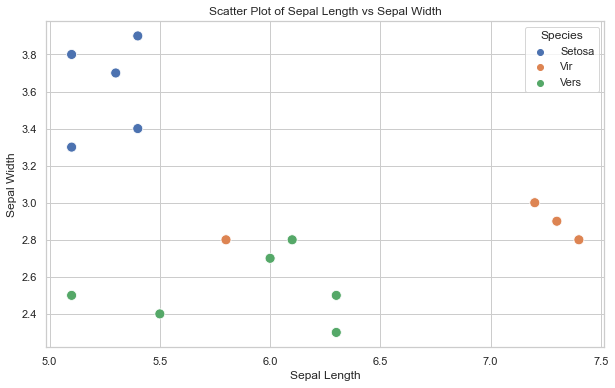

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Sepal Length': [5.3, 5.1, 7.2, 5.4, 5.1, 5.4, 7.4, 6.1, 7.3, 6.0, 5.8, 6.3, 5.1, 6.3, 5.5],
    'Sepal Width': [3.7, 3.8, 3.0, 3.4, 3.3, 3.9, 2.8, 2.8, 2.9, 2.7, 2.8, 2.3, 2.5, 2.5, 2.4],
    'Species': ['Setosa', 'Setosa', 'Vir', 'Setosa', 'Setosa', 'Setosa', 'Vir', 'Vers', 'Vir', 'Vers', 'Vir', 'Vers', 'Vers', 'Vers', 'Vers']
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='Species', s=100, data=df)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

plt.show();

### Predictions

Now, based on the training data points, we will make prediction based on the distance between each new point and all the training data points.

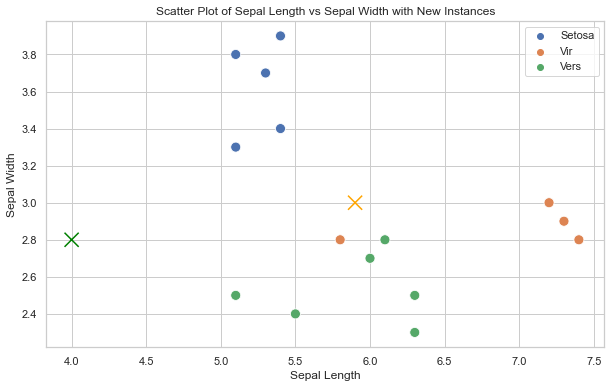

Classified Species for Flower A: Vir
Classified Species for Flower B: Vers


In [71]:
new_data = {
    'Sepal Length': [5.9, 4.0],
    'Sepal Width': [3.0, 2.8],
}

df_new = pd.DataFrame(new_data)

def knn_classify(new_data, training_data, k=1):
    distances = np.sqrt(np.sum((training_data[['Sepal Length', 'Sepal Width']].values - new_data.values)**2, axis=1))
    nearest_neighbor_index = np.argmin(distances)
    return training_data.iloc[nearest_neighbor_index]['Species']

df_new['Species'] = df_new.apply(lambda x: knn_classify(x, df), axis=1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='Species', s=100, data=df)
new_scatter = plt.scatter(df_new['Sepal Length'], df_new['Sepal Width'], marker='x', s=200, c=df_new['Species'].map({'Vir' : 'orange', 'Vers' : 'Green'}))

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width with New Instances')

handles, labels = scatter.get_legend_handles_labels()
handles.append(new_scatter)
plt.legend(handles=handles, labels=labels)

plt.show()

print("Classified Species for Flower A:", df_new.iloc[0]['Species'])
print("Classified Species for Flower B:", df_new.iloc[1]['Species'])

# Training KNN model using Sklearn

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)

In [74]:
X = df.drop(['ID', 'Species'], axis=1)
y = df['Species']

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [75]:
knn.predict(df_new.drop('Species', axis=1))

array(['Vir', 'Vers'], dtype=object)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

knn.predict(df_new.drop('Species', axis=1))

array(['Vers', 'Setosa'], dtype=object)

## Another Example

In [78]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('adult_dataset.csv')

In [80]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [82]:
df.shape

(32561, 15)

In [83]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

In [84]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [85]:
df.shape

(30162, 15)

In [86]:
from sklearn import preprocessing

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [87]:
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [88]:
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [90]:
df['income'] = df['income'].astype('category')
df['income'].head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int32   
 7   education       30162 non-null  int32   
 8   marital.status  30162 non-null  int32   
 9   occupation      30162 non-null  int32   
 10  relationship    30162 non-null  int32   
 11  race            30162 non-null  int32   
 12  sex             30162 non-null  int32   
 13  native.country  30162 non-null  int32   
 14  income          30162 non-null  category
dtypes: category(1), int32(8), int64(6)
memory usage: 2.6 MB


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop('income',axis=1)

y = df['income']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state = 99
)

X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [95]:
X_test.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
22299,43,248094,9,0,0,40,2,11,0,2,4,4,1,38
22895,32,180303,13,0,0,47,4,9,0,2,4,1,1,19
9048,38,114079,9,0,0,44,2,11,2,11,0,4,1,38
20948,46,99086,10,0,0,40,2,15,2,0,5,4,0,38
25361,26,68895,9,0,0,50,2,11,4,0,1,4,1,25


In [96]:
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
pred = knn.predict(X_test)

In [99]:
comp_result = pd.DataFrame(y_test)
comp_result['pred']= pred
comp_result

,income,pred
22299,0,0
22895,0,1
9048,0,0
20948,1,0
25361,0,0
...,...,...
22713,0,0
24718,0,0
3255,0,1
25999,0,0


In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6867
           1       0.42      0.45      0.43      2182

    accuracy                           0.71      9049
   macro avg       0.62      0.63      0.62      9049
weighted avg       0.72      0.71      0.72      9049



In [101]:
print(confusion_matrix(y_test,pred))

[[5479 1388]
 [1193  989]]


In [102]:
print(accuracy_score(y_test, pred))

0.7147751132721848


In [103]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

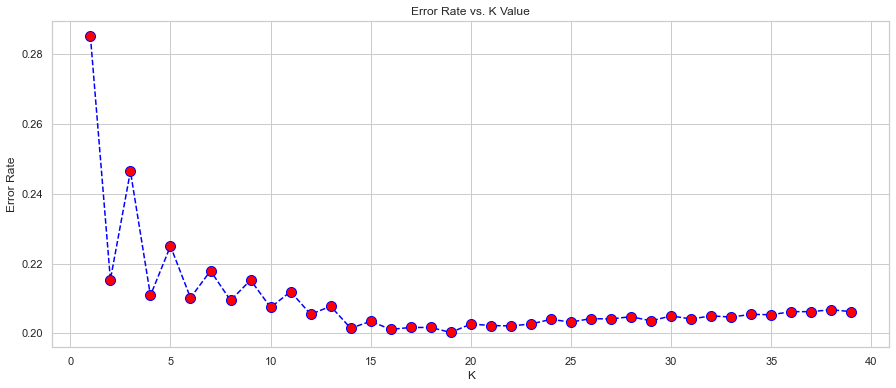

In [104]:
plt.figure(figsize=(15,6))
plt.plot(
    range(1,40),error_rate,color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[5993  874]
 [1356  826]]


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      6867
           1       0.49      0.38      0.43      2182

    accuracy                           0.75      9049
   macro avg       0.65      0.63      0.63      9049
weighted avg       0.74      0.75      0.74      9049



In [106]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[6504  363]
 [1586  596]]


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      6867
           1       0.62      0.27      0.38      2182

    accuracy                           0.78      9049
   macro avg       0.71      0.61      0.62      9049
weighted avg       0.76      0.78      0.75      9049



In [107]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[6760  107]
 [1716  466]]


              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6867
           1       0.81      0.21      0.34      2182

    accuracy                           0.80      9049
   macro avg       0.81      0.60      0.61      9049
weighted avg       0.80      0.80      0.75      9049



In [108]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[6781   86]
 [1726  456]]


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      6867
           1       0.84      0.21      0.33      2182

    accuracy                           0.80      9049
   macro avg       0.82      0.60      0.61      9049
weighted avg       0.81      0.80      0.75      9049

